Regression Challenge


In [1]:
import pandas as pd

data = pd.read_csv('data/real_estate.csv')
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [2]:
data.describe()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


C:\Users\huyho\AppData\Local\Temp/ipykernel_3548/2607394046.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


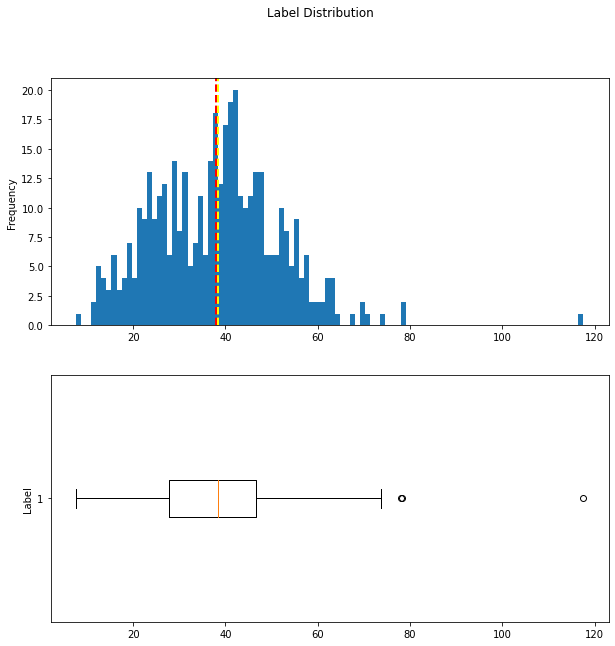

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# Get the label column
name = data.columns[-1]
label = data[name]

def show_distribution(var_data):
    fig, ax = plt.subplots(2,1, figsize = (10,10))

    #Plot histogram
    ax[0].hist(var_data, bins = 100)
    ax[0].set_ylabel("Frequency")

    #statistic
    ax[0].axvline(x= label.mean(), color= 'red', linestyle= 'dashed', linewidth= 2)
    ax[0].axvline(x= label.median(), color= 'yellow', linestyle= 'dashed', linewidth= 2)

    #Plot box
    ax[1].boxplot(var_data, vert= False)
    ax[1].set_ylabel('Label')

    fig.suptitle("Label Distribution")

    fig.show()
show_distribution(label)

Remove outlier


C:\Users\huyho\AppData\Local\Temp/ipykernel_3548/2607394046.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


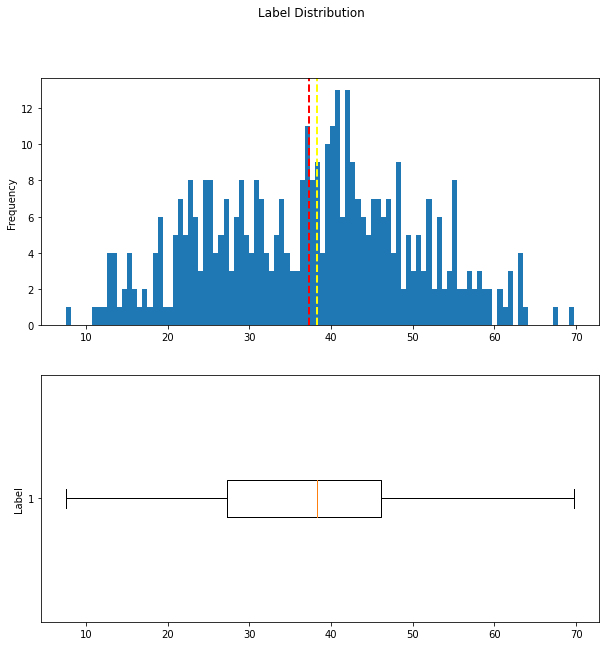

In [4]:
data = data[data[name] < 70]
label = data[name]
show_distribution(label)

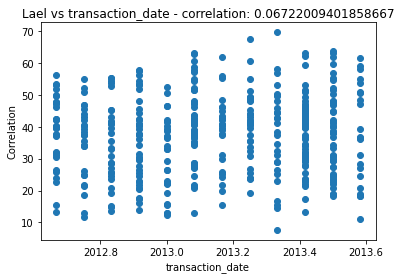

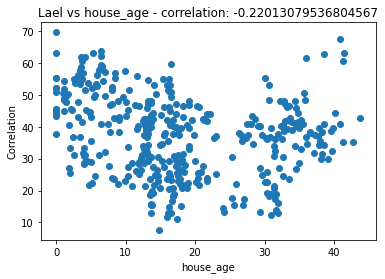

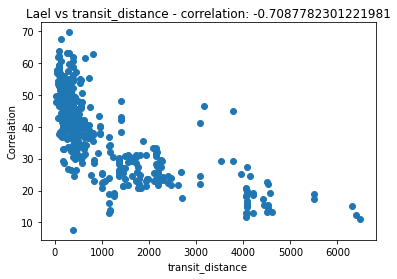

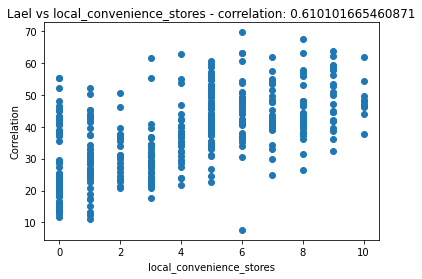

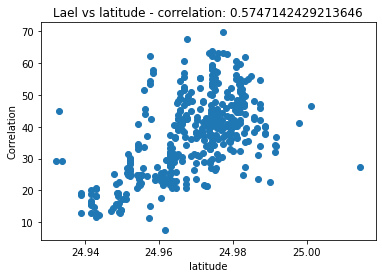

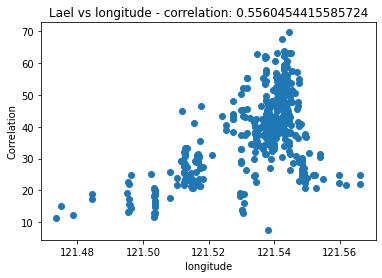

In [5]:
for col in data.columns[0:-1]:
    fig = plt.figure()
    ax = fig.gca()
    feature = data[col]
    correlation = feature.corr(label)
    plt.scatter(x= feature, y = label)
    plt.xlabel(col)
    plt.ylabel("Correlation")
    ax.set_title("Lael vs " + col + " - correlation: " + str(correlation))
    plt.show()

In [6]:
for col in data.columns:
    num = str(data[col].nunique())
    print(col + " : " + num)


transaction_date : 12
house_age : 233
transit_distance : 256
local_convenience_stores : 11
latitude : 231
longitude : 231
price_per_unit : 264


transaction_date and local_convenience_stores seem to be discrete value, so might work better if treater as categorical features


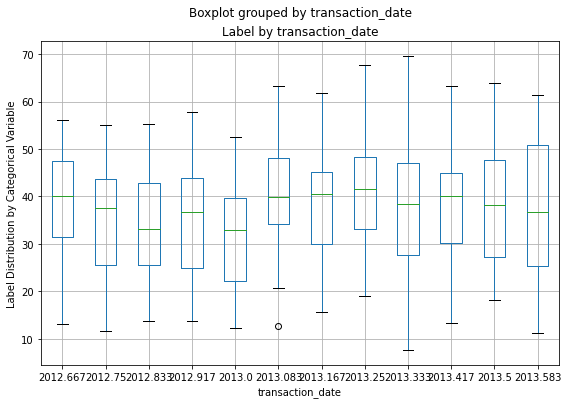

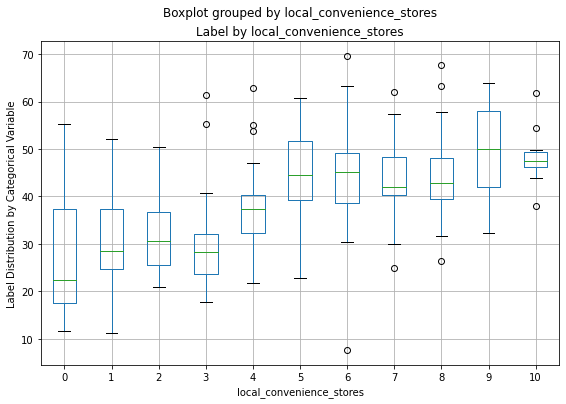

In [7]:
#plot a boxplot for the label by each categorical feature
for col in ['transaction_date', 'local_convenience_stores']:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    data.boxplot(column= 'price_per_unit', by= col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel('Label Distribution by Categorical Variable')
plt.show()


In [11]:
from sklearn.model_selection import train_test_split

#Sepatate feature (column 1 [house a_age] to the last but one) and labels (the last column)

X, y = data[data.columns[1:-1]].values, data[data.columns[-1]].values

print(X.shape)
#split data 70 40 into train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 0)
print("Training set: ", X_train.shape)
print("Test set: ", X_test.shape)

(408, 5)
Training set:  (285, 5)
Test set:  (123, 5)


Preprocess the data and train a model in a pipeline
Normalize the numeric feature, then use a RandomForestRegression to train a model


In [14]:
#train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
import numpy as np

#Define preprocessing for numeric columns (scale them)
numeric_features = [0,1,3,4]
numeric_transformer = Pipeline(steps= [
    ('scaler', StandardScaler())
])

#combine preprocessing steps
preprocessor = ColumnTransformer( transformers=[('num', numeric_transformer, numeric_features),])

#creater preprocessing and training pipeline
pipeline = Pipeline(steps= [
    ('preprocessiong', preprocessor),
    ('regressor', RandomForestRegressor())
])

#fit the pipeline to train a linear regressiong model on the training set
model = pipeline.fit(X_train, (y_train))
print(model)

Pipeline(steps=[('preprocessiong',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 3, 4])])),
                ('regressor', RandomForestRegressor())])


MSE:  36.458978473617215
RMSE:  6.038127066700171
Re:  0.6888938898617345


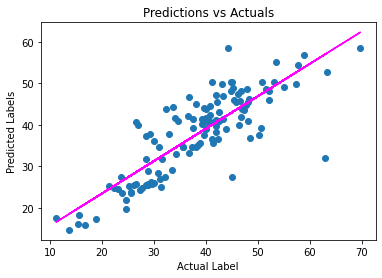

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

#get predictions
predictions = model.predict(X_test)

#Display the metrics
mse = mean_squared_error(y_test, predictions)
print('MSE: ', mse)
rmse= np.sqrt(mse)
print('RMSE: ', rmse)
r2 = r2_score(y_test, predictions)
print('Re: ', r2)

#plot
plt.scatter(y_test, predictions)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Labels')
plt.title('Predictions vs Actuals')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color = 'magenta')
plt.show()

In [22]:
import joblib

#save the model as a pickle file
filename = './real_estate_model.pkl'
joblib.dump(model, filename)

loaded_model = joblib.load(filename)

# An array of features for each transaction (don't include the transaction date)
X_new = np.array([[16.2,289.3248,5,24.98203,121.54348],
                  [13.6,4082.015,0,24.94155,121.5038]])

#use the model to predict unit price
result = loaded_model.predict(X_new)
print('Prediction: ')
for prediction in result:
    print(round(prediction, 2))


Prediction: 
49.01
16.08
